### Проверка Н0-гипотезы. О том, что вес Мужчин не отличается от веса Женщин

Подключение библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка и просмотр данных

In [ ]:
df = pd.read_excel('Исходник_Кондратьев_(FPS-21)_Гипотезы и АБ-тестирование.xlsx')
df.head()

,ID,Gender,Height,Weight
0,10001,Male,174.782639,78.652188
1,10002,Female,165.183571,74.332607
2,10003,Male,181.542046,81.693920
3,10004,Female,167.845912,75.530661
4,10005,Female,160.475255,72.213865


Формирование выборок по полу

In [ ]:
# Формирование выборок
df_1 = df[df['Gender'] == 'Male']
df_2 = df[df['Gender'] == 'Female']

print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2)) # С помощью функции Len

Выборкки имеют одинаковую длинну:  True


Визуализация доверительных интервалов

<ipython-input-4-4c47ad688171>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Weight'], 50) # (50) это число разбиений
<ipython-input-4-4c47ad688171>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['Weight'], 50)


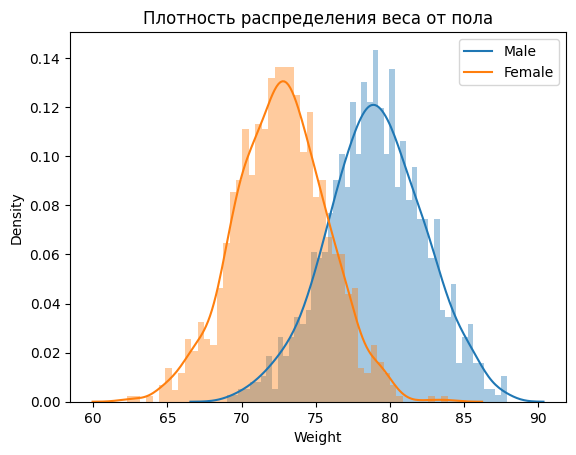

In [ ]:
# С помощью библиотеки seaborn и функции distplot
sns.distplot(df_1['Weight'], 50) # (50) это число разбиений 
sns.distplot(df_2['Weight'], 50)
plt.title('Плотность распределения веса от пола') # название
plt.legend(['Male', 'Female']) # Цвет
plt.show()

Подключения библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind # библиотека scipy.stats и критерий ttest_ind (t-критерий Стьюдента)
from scipy.stats import mannwhitneyu # библиотека scipy.stats и критерий mannwhitneyu (U-критерий Манна - Уитни)

alpha = 0.05                         # Уровень значимости

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['Weight'], df_2['Weight']) # Создаем переменную result, записываем туда результат выполнения функции ttest
print('p-value: %.8f' % result.pvalue) # Вывести результаты p-value с точностью 8-знаков после запятой

if (result.pvalue < alpha): # Сравниваем p-value с 0,05 с выводим результат if-если else-иначе
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


In [ ]:
# Вес мужчин статистически значимо отличатется от женщин

Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
result = mannwhitneyu(df_1['Weight'], df_2['Weight']) # Записываес в переменную result, результат выполнения функции mannwhitneyu
print('p-value: %.8f' % result.pvalue)                 # Вывести результаты p-value с точностью 8-знаков после запятой

if (result.pvalue < alpha):                          # Сравниваем p-value с 0,05 с выводим результат if-если else-иначе     
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


In [ ]:
# Вес мужчин статистически значимо отличатется от женщин

Проверка Бутстрап

• Несмотря на то, что bootstrap не чувствителен к распределению данных (непараметрический) и не требователен к объёмам данных, всё же стоит сказать, что он не является панацеей, но на данный момент является одним из самых универсальных инструментов проверки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm.auto import tqdm

alpha = 0.05                          # Уровень значимости

In [ ]:
def get_bootstrap(
    data_column_1,                    # Числовые значения первой выборки
    data_column_2,                    # Числовые значения второй выборки
    boot_it = 1000,                   # Количество бутстрэп-подвыборок
    statistic = np.mean,              # Интересующая нас статистика
    bootstrap_conf_level = 1-alpha    # Уровень значимости
):
    
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):    # Извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True            # Параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,                 # Чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    print('p-value: %.8f' % p_value)

    return p_value

  0%|          | 0/1000 [00:00<?, ?it/s]

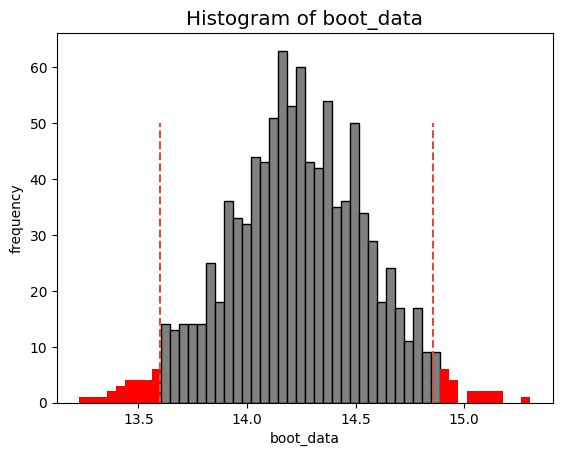

p-value: 0.00000000
Отвергаем нулевую гипотезу


In [ ]:
tmp_boot = get_bootstrap(
    df_1['Height'],                 # числовые значения первой выборки
    df_2['Height'],                 # числовые значения второй выборки
    boot_it = 1000,                 # количество бутстрэп-подвыборок
    statistic = np.mean,            # интересующая нас статистика
    bootstrap_conf_level = 1-alpha  # уровень значимости
)

if (tmp_boot < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')